In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor


In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pyspark.sql.types import IntegerType, DateType, ArrayType, StringType, FloatType, TimestampType


In [3]:
from project.blocks.ayan_spark_blocks import MercStatic
from project.blocks.ayan_spark_blocks import ReadCsvProjectSpace
from project.blocks.ayan_spark_blocks import TranCityTS
from project.blocks.ayan_spark_blocks import TranTypeTS
from project.blocks.ayan_spark_blocks import NonSparkPath
from project.blocks.ayan_spark_blocks import CustStatic
from project.blocks.ayan_spark_blocks import ProdTypeTS
from project.blocks.ayan_spark_blocks import CustMercTS
from project.blocks.ayan_spark_blocks import DropDuplicates
from project.blocks.ayan_spark_blocks import SparkConcat

In [4]:
import os

os.environ["PYTHONPATH"] = "/usr/local/bin/python:/home/aios/published-packages/"

In [5]:
# def project_space_path(path):
#     ps = api.datasources('Project Space')
#     return os.path.join(ps.abspath(), path)


In [6]:
nsp = NonSparkPath(ip_path='customer_data.csv')

In [7]:
rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
rcp.executor = SparkExecutor

In [8]:
cs = CustStatic(ip_data = rcp.data, config={}, source="")
cs.executor = SparkExecutor

In [9]:
drp = DropDuplicates(ip_data = cs.customer_static, config={}, source="")
drp.executor = SparkExecutor

In [10]:
ms = MercStatic(ip_data = rcp.data, config={}, source="")
ms.executor = SparkExecutor

In [11]:
cm_ts = CustMercTS(ip_data = rcp.data, config={}, source="")
cm_ts.executor = SparkExecutor

In [12]:
pt_ts = ProdTypeTS(ip_data = rcp.data, config={}, source="")
pt_ts.executor = SparkExecutor

In [13]:
tc_ts = TranCityTS(ip_data = rcp.data, config={}, source="")
tc_ts.executor = SparkExecutor

In [14]:
tt_ts = TranTypeTS(ip_data = rcp.data, config={}, source="")
tt_ts.executor = SparkExecutor

In [15]:
merged_cust = SparkConcat(df1=cm_ts.customer_ts, df2=cs.customer_static, cols=["card_number","customer_name"])
merged_merc = SparkConcat(df1=cm_ts.merchant_ts, df2=ms.merchant_static, cols=["merchant_id","merchant_city","merchant_state"])


In [16]:
pipe = rf.Pipeline('temp', targets = [merged_cust, merged_merc, pt_ts, tc_ts, tt_ts])

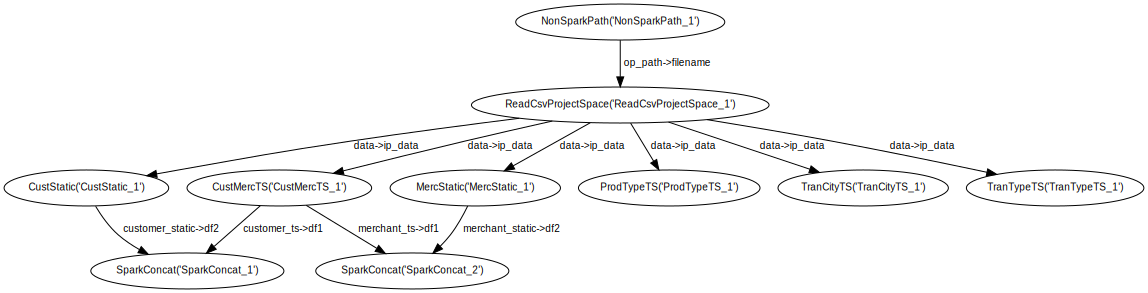

In [17]:
pipe

In [19]:
pipe.execute()

log path: /tmp/tmp09d4ewba/temp


NonSparkPath_1 tcp://0.0.0.0:57857
CustMercTS_1 tcp://0.0.0.0:61982
CustStatic_1 tcp://0.0.0.0:51900
TranCityTS_1 tcp://0.0.0.0:61562
SparkConcat_1 tcp://0.0.0.0:64059
ReadCsvProjectSpace_1 tcp://0.0.0.0:58784
ProdTypeTS_1 tcp://0.0.0.0:53277
TranTypeTS_1 tcp://0.0.0.0:58400
MercStatic_1 tcp://0.0.0.0:59000
SparkConcat_2 tcp://0.0.0.0:57497
Hello
root
 |-- transaction_id: string (nullable = true)
 |-- time: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- card_number: string (nullable = true)
 |-- card_type: string (nullable = true)
 |-- physical_card_type: string (nullable = true)
 |-- merchant_id: string (nullable = true)
 |-- merchant_city: string (nullable = true)
 |-- merchant_state: string (nullable = true)
 |-- transaction_type: string (nullable = true)
 |-- transaction_type_sub: string (nullable = true)
 |-- amount: string (nullable = true)
 |-- product_type: string (nullable = true)
 |-- fraud_risk: string (nullable = true)
 |-- One Time Heavy Loot Sc

{}

In [ ]:
pipe.execute()

log path: /tmp/tmpg1lo6mit/temp


NonSparkPath_1 tcp://0.0.0.0:60209
ReadCsvProjectSpace_1 tcp://0.0.0.0:62364
MercStatic_1 tcp://0.0.0.0:55326
ProdTypeTS_1 tcp://0.0.0.0:53293
CustStatic_1 tcp://0.0.0.0:64009
SparkConcat_1 tcp://0.0.0.0:61994
SparkConcat_2 tcp://0.0.0.0:56240
TranCityTS_1 tcp://0.0.0.0:60779
TranTypeTS_1 tcp://0.0.0.0:59667
CustMercTS_1 tcp://0.0.0.0:54150


In [18]:
razor.api.pipelines.save(pipe)

SavePipelineError: Pipeline with name `temp` already exists. Use different name to save pipeline. Or set `overwrite=True` to update the existing pipeline.